# overview - stitch without overlap

In [9]:
from leicaexperiment import Experiment

## rotate images

In [48]:
whole = 'experiment--2015_04_10_07_42_13'
exp_path = r"D:\MatrixScreenerImages\3.3.0_9757\ ".strip()
experiment = Experiment(exp_path + whole)
!dir $experiment.path

 Volume in drive D is DATADRIVE1
 Volume Serial Number is F805-2E08

 Directory of D:\MatrixScreenerImages\3.3.0_9757\experiment--2015_04_10_07_42_13

04/10/2015  09:42 AM    <DIR>          .
04/10/2015  09:42 AM    <DIR>          ..
04/10/2015  09:42 AM    <DIR>          AdditionalData
04/10/2015  09:42 AM    <DIR>          slide--S00
               0 File(s)              0 bytes
               4 Dir(s)  1,672,440,528,896 bytes free


In [49]:
compressed = experiment.compress(delete_tif=True)
assert len(compressed) == len(experiment.images)

In [50]:
from PIL import Image

In [51]:
for img in experiment.images:
    i = Image.open(img)
    i = i.rotate(270)
    i.save(img)

## count of wells

In [52]:
from leicascanningtemplate import ScanningTemplate

In [53]:
tmpl = ScanningTemplate(experiment.scanning_template)

In [54]:
tmpl.properties.CountOfScanFieldsX, tmpl.properties.CountOfScanFieldsY

(17, 10)

In [55]:
i = Image.open(experiment.images[0])

In [56]:
i.size

(512, 512)

In [57]:
i.close()

In [58]:
import numpy as np
from skimage import io

In [59]:
overview = np.zeros((512*10, 512*17), dtype=np.uint8)

In [60]:
experiment.images[0:20:2]

['D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_10_07_42_13\\slide--S00\\chamber--U00--V00\\field--X00--Y00\\image--L0000--S00--U00--V00--J08--E00--O00--X00--Y00--T0000--Z00--C00.png',
 'D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_10_07_42_13\\slide--S00\\chamber--U00--V00\\field--X00--Y02\\image--L0000--S00--U00--V00--J08--E00--O00--X00--Y02--T0000--Z00--C00.png',
 'D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_10_07_42_13\\slide--S00\\chamber--U00--V00\\field--X00--Y04\\image--L0000--S00--U00--V00--J08--E00--O00--X00--Y04--T0000--Z00--C00.png',
 'D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_10_07_42_13\\slide--S00\\chamber--U00--V00\\field--X00--Y06\\image--L0000--S00--U00--V00--J08--E00--O00--X00--Y06--T0000--Z00--C00.png',
 'D:\\MatrixScreenerImages\\3.3.0_9757\\experiment--2015_04_10_07_42_13\\slide--S00\\chamber--U00--V00\\field--X00--Y08\\image--L0000--S00--U00--V00--J08--E00--O00--X00--Y08--T0000--Z00--C00.png',
 'D:\\MatrixScr

In [61]:
for n, img in enumerate(experiment.images):
    x = (n // 10) * 512
    x_end = x + 512
    y = (n % 10) * 512
    y_end = y + 512
    overview[y:y_end,x:x_end] = io.imread(img)

In [63]:
io.imsave('overview.png', overview)

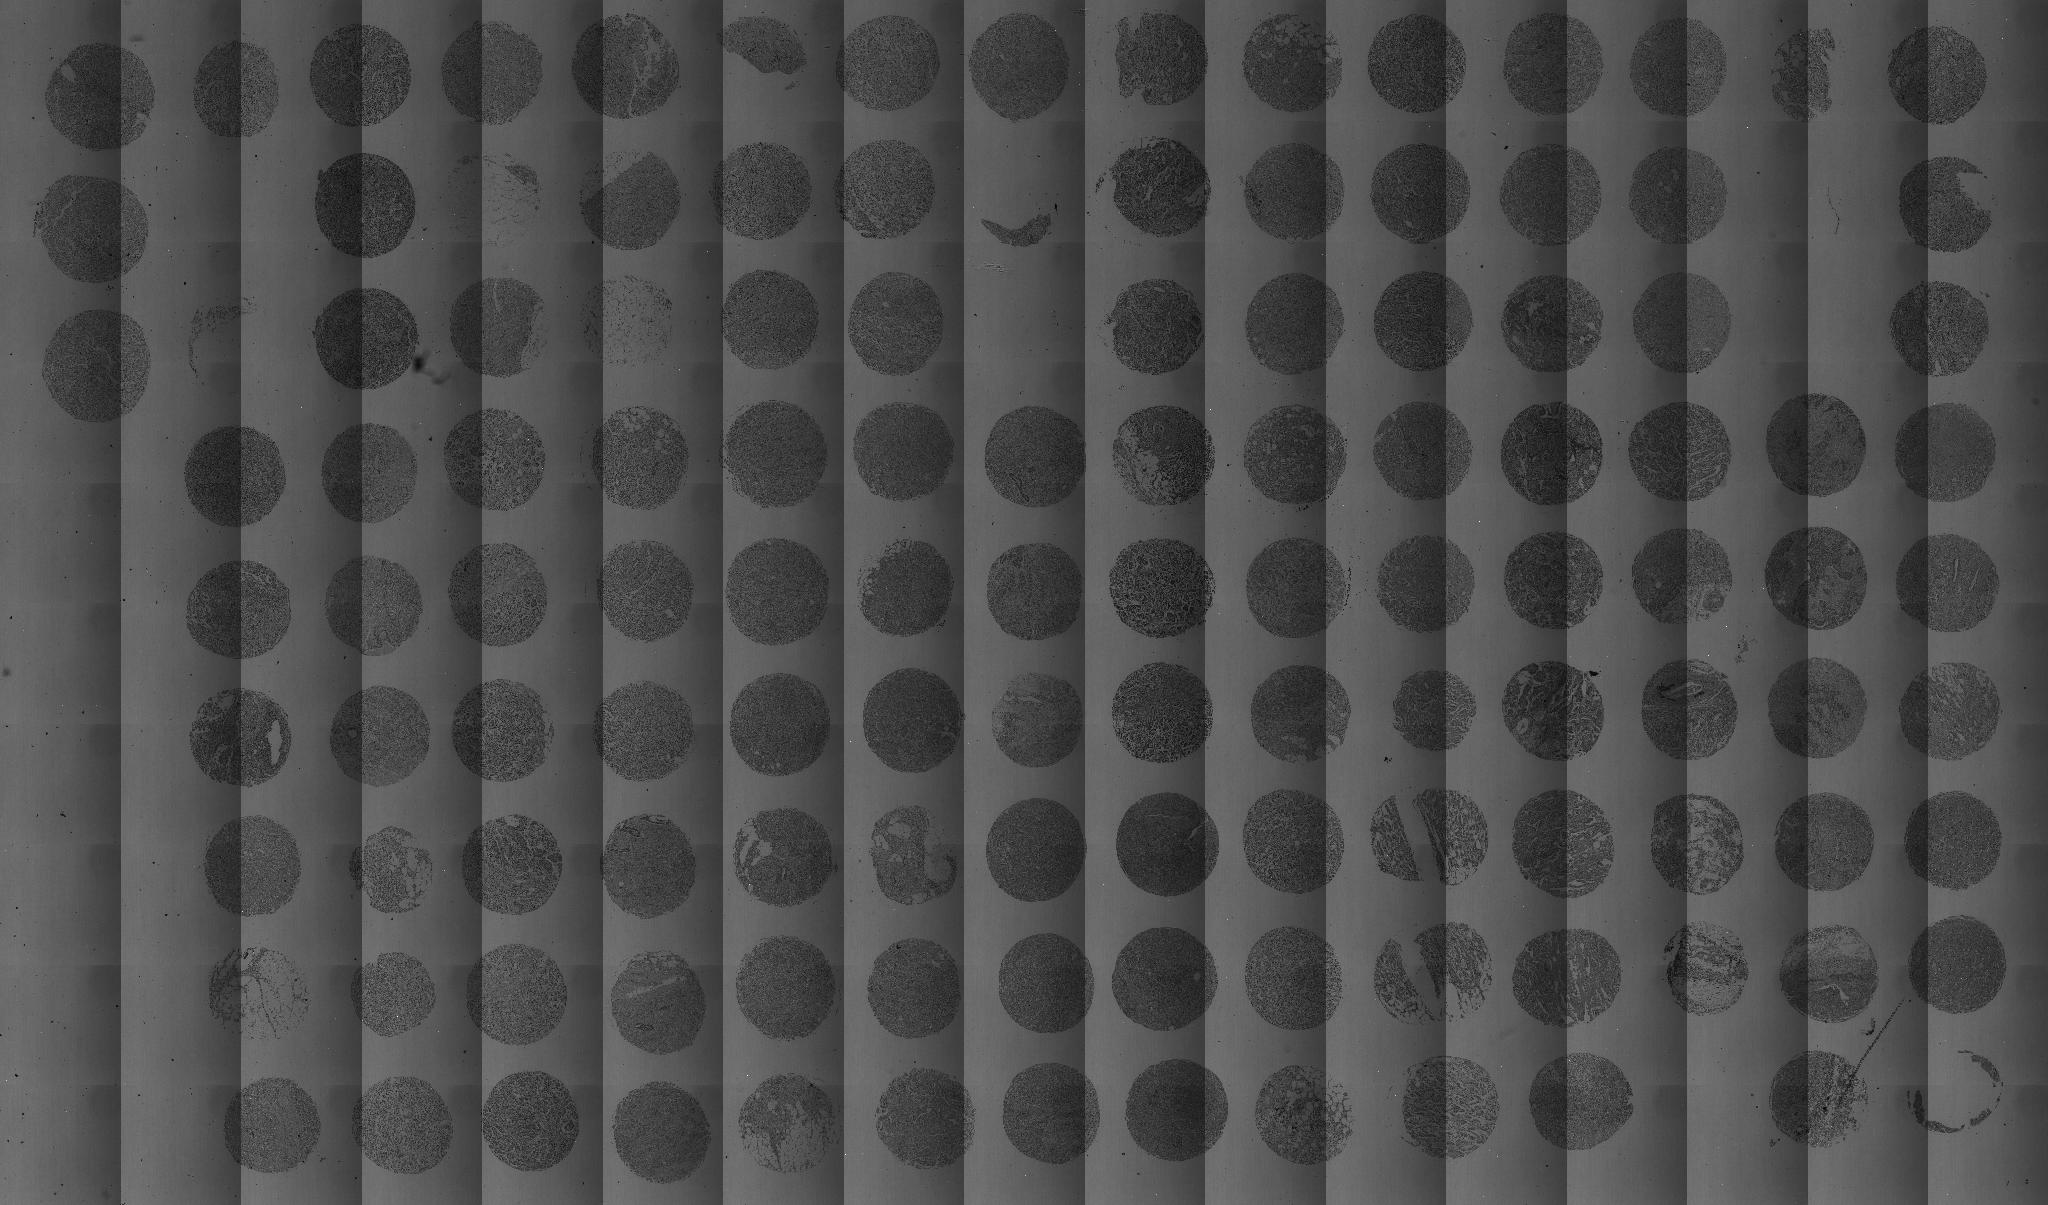

In [1]:
from IPython import display
display.Image('overview.png', width=1024)

regular merge with rotation 1.7 degrees works with some glitches - need to find a automatic way

# find img size

In [72]:
from leicacam import cam

In [73]:
cam = CAM()

In [76]:
x1 = cam.get_information()['xpos']

In [77]:
x2 = cam.get_information()['xpos']

In [80]:
(float(x2) - float(x1)) * 1e6

-1559.7598999999989

In [87]:
x1 = cam.get_information()['xpos']

In [88]:
x2 = cam.get_information()['xpos']

In [89]:
(float(x2) - float(x1)) * 1e6

-1590.0822000000023

Pixel size probably not 3.03 um as reported in GUI